In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned_data1.csv")

In [3]:
X = df.drop(columns=["PCOS (Y/N)"])
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [4]:
y = df["PCOS (Y/N)"].values

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(X)
X = scaler.transform(X)

In [6]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=10, algorithm='randomized',
                   random_state=0)
X = svd.fit_transform(X)

C:\Users\pavithra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'SVD2')

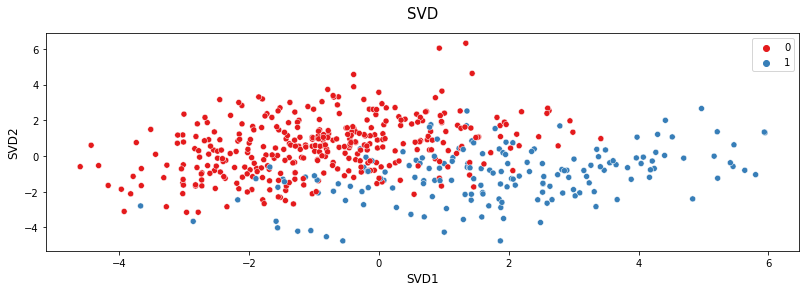

In [7]:
fig, ax = plt.subplots( figsize=(5 ,4))
sns.scatterplot(X[:,0], X[:,1],ax=ax,hue=y,palette='Set1')
ax.set_title("SVD", fontsize=15, pad=15)
ax.set_xlabel("SVD1", fontsize=12)
ax.set_ylabel("SVD2", fontsize=12)

In [8]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [9]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import metrics

In [10]:
classifier = MLPClassifier(hidden_layer_sizes=15, max_iter=80,activation='relu', solver='sgd', verbose=5,random_state=10)
classifier.fit(train_features, train_target)
    
prediction = classifier.predict(test_features)
score = np.round(metrics.accuracy_score(test_target, prediction),2)
print("Mean accuracy of prediction: " +str(score*100))

Iteration 1, loss = 0.93085908
Iteration 2, loss = 0.92672984
Iteration 3, loss = 0.92044558
Iteration 4, loss = 0.91273021
Iteration 5, loss = 0.90351612
Iteration 6, loss = 0.89366951
Iteration 7, loss = 0.88285010
Iteration 8, loss = 0.87199137
Iteration 9, loss = 0.86057966
Iteration 10, loss = 0.84915415
Iteration 11, loss = 0.83771392
Iteration 12, loss = 0.82661454
Iteration 13, loss = 0.81522233
Iteration 14, loss = 0.80447963
Iteration 15, loss = 0.79339934
Iteration 16, loss = 0.78330832
Iteration 17, loss = 0.77319330
Iteration 18, loss = 0.76317596
Iteration 19, loss = 0.75356939
Iteration 20, loss = 0.74451116
Iteration 21, loss = 0.73558437
Iteration 22, loss = 0.72676337
Iteration 23, loss = 0.71853876
Iteration 24, loss = 0.71044227
Iteration 25, loss = 0.70259287
Iteration 26, loss = 0.69520171
Iteration 27, loss = 0.68797874
Iteration 28, loss = 0.68110428
Iteration 29, loss = 0.67417990
Iteration 30, loss = 0.66772414
Iteration 31, loss = 0.66138156
Iteration 32, los

C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


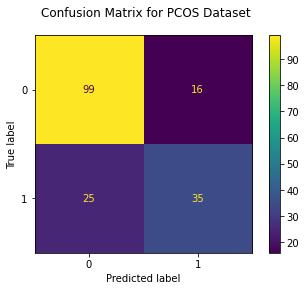

In [11]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(classifier, test_features, test_target)
fig.figure_.suptitle("Confusion Matrix for PCOS Dataset")
plt.show()

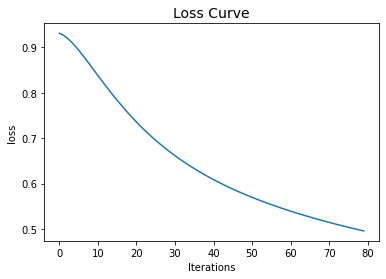

In [12]:
plt.plot(classifier.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

In [13]:
print(classification_report(test_target, prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       115
           1       0.69      0.58      0.63        60

    accuracy                           0.77       175
   macro avg       0.74      0.72      0.73       175
weighted avg       0.76      0.77      0.76       175



In [14]:
#Validation

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE_test = sqrt(mean_squared_error(test_target, prediction)) 

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = classifier.predict(train_features)
#calculate RMSE
RMSE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%RMSE_train)
print('\n')
print('Testing RMSE: %.4f'%RMSE_test)

Traning RMSE: 0.4694


Testing RMSE: 0.4840


In [15]:
#Validation

from sklearn.metrics import mean_absolute_error
from math import sqrt

#calculate RMSE
MAE_test = mean_absolute_error(test_target, prediction)

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = classifier.predict(train_features)
#calculate RMSE
MAE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%MAE_train)
print('\n')
print('Testing RMSE: %.4f'%MAE_test)

Traning RMSE: 0.4694


Testing RMSE: 0.2343
